<a href="https://colab.research.google.com/github/BowoSubiakto1/Telco-Churn-Exploratory-Data-Analysist/blob/main/HW_DAY17_SUBIAKTO_AJI_PRABOWO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#load the data set
df = pd.read_csv('/content/drive/MyDrive/dibimbing/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#check the data sample of 5 top rows
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##General Information, Missing Values and Duplicated Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Finding:

Dari hasil diatas didapat bahwa terdapat 7043 baris data dan semua kolom tidak terdeteksi adanya missing value, Semua kolom bertipe object kecuali `SeniorCitizen`, `tenure`, dan `MonthlyCharges`. Seharusnya kolom `TotalCharges` juga harus berupa data numeric, maka perlu dilakukan perubahan type data.

In [ ]:
# exclude rows with TotalCharges column contains white space
df = df.loc[~df['TotalCharges'].str.contains(' ')]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
# transform TotalCharges col to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# number of missing values per column
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Finding:

Tidak terdapat missing value lagi setelah dilakukan exclude pada `TotalCharges` dengan data yang merupakan white space. Terdapat 11 baris data yang mengandung white space dan telah diexclude

In [ ]:
# number of duplicated data
df.duplicated().sum()

0

Finding:

Tidak terdapat data terduplikasi

##Data Understanding

###Statistical Summary

In [ ]:
# group column names based on type
categoricals = ['customerID',  'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

numericals = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
# numerical statistical sumary
df[numericals].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observation:
*   `SeniorCitizen` is actually a categorial data, with the value 0 and 1
*   Mean > 50% (Median) in `tenure` and `TotalCharges` columns, indicating both are slight positively skewed distribution
*   Mean < 50% (Median) in `MonthlyCharges` column, indicating it is slight negatively skewed distribution



In [ ]:
# describe method on categorical data
df[categoricals].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


##Univariate Analysis


###Boxplot

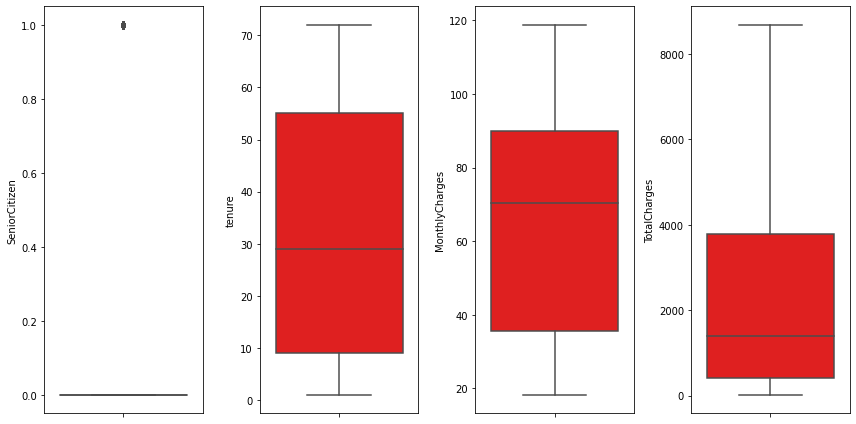

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

Observation:

There is no any outliers in columns which the type is numerical

### KDE plot for knowing the distribution form

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

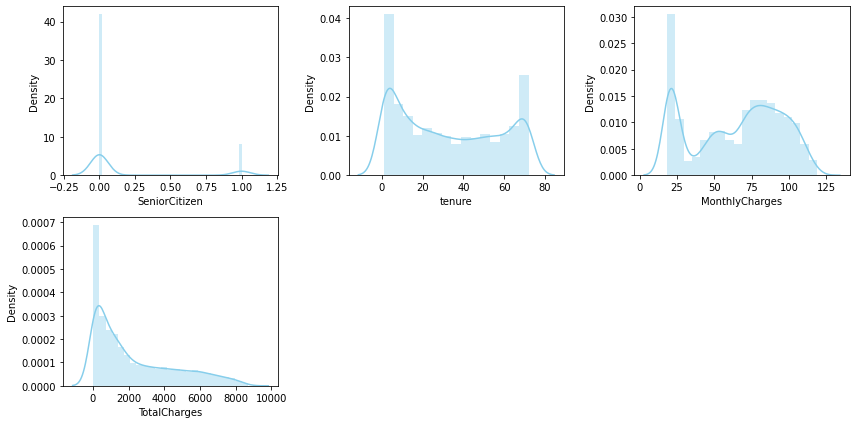

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:

1. There is no any symetric distribution from all numerical type columns.
2. `SeniorCitizen` has boolean value, 0 and 1.

##Multivariate Analysis

In [ ]:
# remember the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


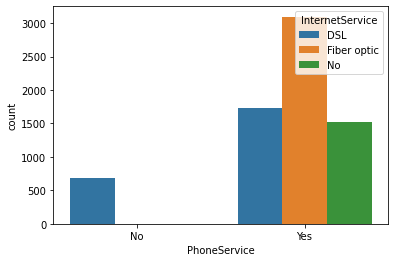

In [ ]:
#Check the column PhoneService and InternetService
sns.countplot(data=df,
            x='PhoneService',
            hue='InternetService')

Observation:
1. All of customers who subscribe the `InternetService` without subscribe `PhoneService` use DSL.
2. Most of customers who subscribe the `PhoneService` and `InternetService` use Fiber Optic for their internet service.

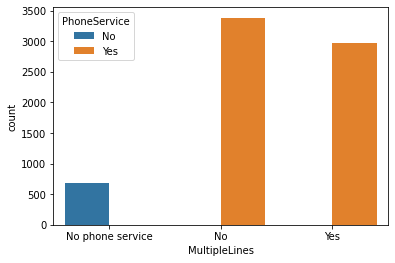

In [ ]:
#Check the column MultipleLines and PhoneService
sns.countplot(data=df,
            x='MultipleLines',
            hue='PhoneService')

Observation:

There are 3 categories in `MultipleLines` column: No phone service, No and Yes. Based on the graphics above, the 'No phone service' has value 'no' in column `PhoneService`, because the customers didn't subscribe the PhoneService, ofcourse they won't subscribe the MultipleLines. So we will replace the answer of 'No phone service' to be 'No' value, so it will make `MultipleLines` column has only 2 unique values which are 'Yes' and 'No'

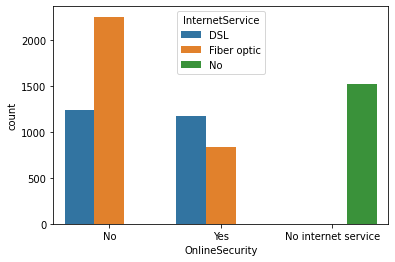

In [ ]:
#Check the column OnlineSecurity and InternetService
sns.countplot(data=df,
            x='OnlineSecurity',
            hue='InternetService')

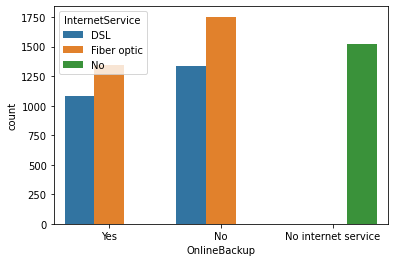

In [ ]:
#Check the column OnlineBackup and InternetService
sns.countplot(data=df,
            x='OnlineBackup',
            hue='InternetService')

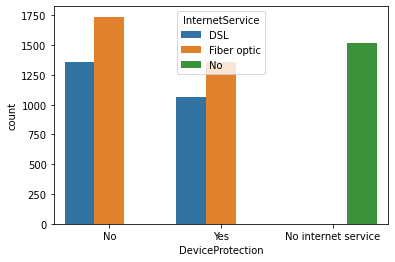

In [ ]:
#Check the column DeviceProtection and InternetService
sns.countplot(data=df,
            x='DeviceProtection',
            hue='InternetService')

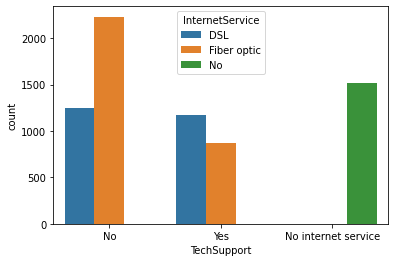

In [ ]:
#Check the column TechSupport and InternetService
sns.countplot(data=df,
            x='TechSupport',
            hue='InternetService')

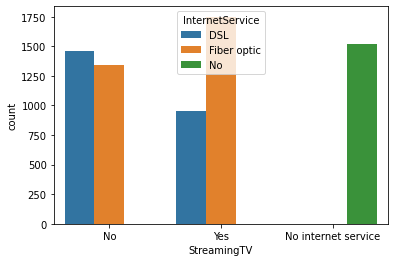

In [ ]:
#Check the column StreamingTV and InternetService
sns.countplot(data=df,
            x='StreamingTV',
            hue='InternetService')

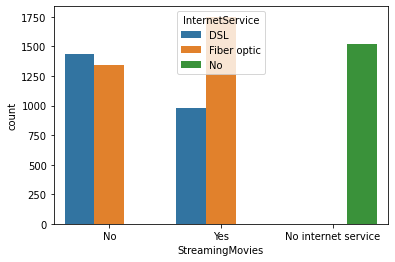

In [ ]:
#Check the column StreamingMovies and InternetService
sns.countplot(data=df,
            x='StreamingMovies',
            hue='InternetService')

Observation:

There are 3 categories in `OnlineSecurity`	`OnlineBackup`	`DeviceProtection`,	`TechSupport`,	`StreamingTV`, `StreamingMovies`  columns: 'No internet service', 'No' and 'Yes'. Based on the graphics above, the 'No internet service' has value 'no' in column `InternetService`, because the customers didn't subscribe the InternetService, ofcourse they won't subscribe these services. So we will replace the answer of 'No internet service' to be 'No' value, so it will make these columns have only 2 unique values which are 'Yes' and 'No'

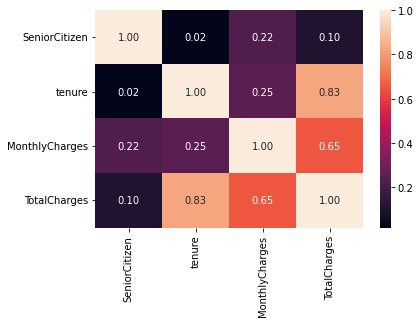

In [ ]:
# correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation:
1. `tenure` and `total_charges` are highly correlated each other
2. choose either of them for modelling because they are redundant

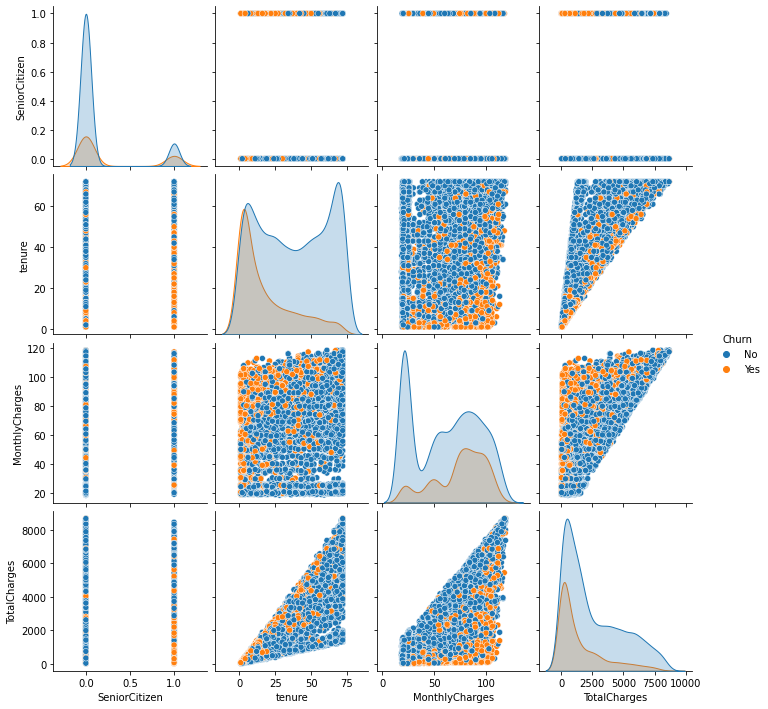

In [ ]:
# pairplot of the data
sns.pairplot(df, hue='Churn')

From the graphics, customer who has longer tenure are less to churn

##Deep dive EDA questions
1. What is the most popular product which is subscribed by customers (young and senior customer)?
2. What is the most popular payment method for the young generations based on he/she has partner or not?

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#select only customer senior
df_senior = df[df['SeniorCitizen']==1]
df_senior.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No


In [ ]:
#delete unnecesary column to answer the question no 1
df_senior = df_senior.drop(['customerID', 'SeniorCitizen', 'Partner','Dependents','tenure','Contract','PaperlessBilling', 'PaymentMethod', 'MonthlyCharges','TotalCharges','Churn'], axis = 1)
df_senior.head(5)

,gender,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
20,Male,No,No phone service,DSL,No,No,Yes,No,No,Yes
30,Female,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No
31,Male,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes
34,Male,Yes,No,DSL,No,No,No,No,No,No
50,Female,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No


In [ ]:
#Use melt to make easier for visualization
df_senior_melt = df_senior.melt(
    id_vars='gender',
    var_name='services',
    value_name='YesNo'
)
df_senior_melt

,gender,services,YesNo
0,Male,PhoneService,No
1,Female,PhoneService,Yes
2,Male,PhoneService,Yes
3,Male,PhoneService,Yes
4,Female,PhoneService,Yes
...,...,...,...
10273,Female,StreamingMovies,Yes
10274,Female,StreamingMovies,Yes
10275,Male,StreamingMovies,No
10276,Male,StreamingMovies,No


In [ ]:
#check the unique value of  YesNo column
df_senior_melt['YesNo'].unique()

array(['No', 'Yes', 'No phone service', 'DSL', 'Fiber optic',
       'No internet service'], dtype=object)

In [ ]:
#simplify to be only 2 values of YesNo column
df_senior_melt = df_senior_melt[df_senior_melt['YesNo'] != 'No']
df_senior_melt = df_senior_melt[df_senior_melt['YesNo'] != 'No phone service']
df_senior_melt = df_senior_melt[df_senior_melt['YesNo'] != 'No internet service']
df_senior_melt

,gender,services,YesNo
1,Female,PhoneService,Yes
2,Male,PhoneService,Yes
3,Male,PhoneService,Yes
4,Female,PhoneService,Yes
5,Female,PhoneService,Yes
...,...,...,...
10264,Female,StreamingMovies,Yes
10267,Female,StreamingMovies,Yes
10269,Male,StreamingMovies,Yes
10273,Female,StreamingMovies,Yes


In [ ]:
#use the groupby to find the number of customer who use any kind of product
df_senior_melt_group = df_senior_melt.groupby(['services','gender']).size().reset_index(name='counts').sort_values('counts',ascending=False)

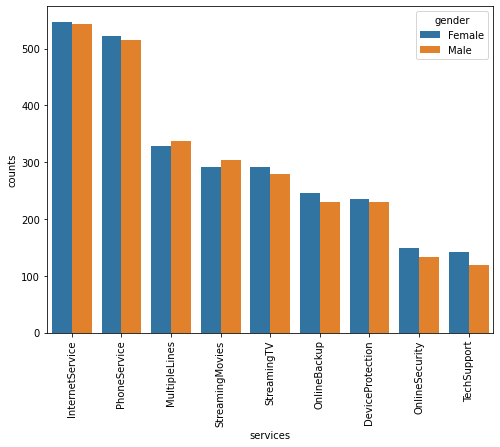

In [ ]:
#Create the visualization using barchart
plt.figure(figsize=(8,6))
sns.barplot(data=df_senior_melt_group, x='services', y='counts', hue='gender')
plt.xticks(rotation=90)
plt.show()

Observation:

What an interesting insight it is.
The `InternetService` subscribers number from `SeniorCiziten` (>65 yo) is bigger than `PhoneService`. 

In [ ]:
#Find the young customer most subscribed service
#Use the same steps as Senior
df_young = df[df['SeniorCitizen']==0]
df_young = df_young.drop(['customerID', 'SeniorCitizen', 'Partner','Dependents','tenure','Contract','PaperlessBilling', 'PaymentMethod', 'MonthlyCharges','TotalCharges','Churn'], axis = 1)
df_young_melt = df_young.melt(
    id_vars='gender',
    var_name='services',
    value_name='YesNo'
)
df_young_melt = df_young_melt[df_young_melt['YesNo'] != 'No']
df_young_melt = df_young_melt[df_young_melt['YesNo'] != 'No phone service']
df_young_melt = df_young_melt[df_young_melt['YesNo'] != 'No internet service']
df_young_melt

,gender,services,YesNo
1,Male,PhoneService,Yes
2,Male,PhoneService,Yes
4,Female,PhoneService,Yes
5,Female,PhoneService,Yes
6,Male,PhoneService,Yes
...,...,...,...
52998,Male,StreamingMovies,Yes
53004,Female,StreamingMovies,Yes
53006,Male,StreamingMovies,Yes
53007,Female,StreamingMovies,Yes


In [ ]:
df_young_melt_group = df_young_melt.groupby(['services','gender']).size().reset_index(name='counts').sort_values('counts',ascending=False)
df_young_melt_group

,services,gender,counts
11,PhoneService,Male,2683
10,PhoneService,Female,2631
3,InternetService,Male,2232
2,InternetService,Female,2190
4,MultipleLines,Female,1157
5,MultipleLines,Male,1145
12,StreamingMovies,Female,1078
15,StreamingTV,Male,1072
14,StreamingTV,Female,1059
13,StreamingMovies,Male,1058


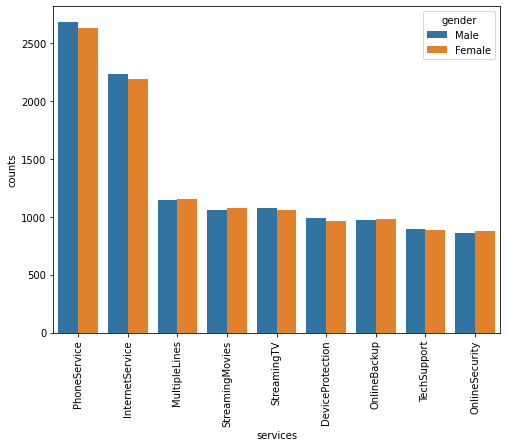

In [ ]:
#create the visualization using barchart
plt.figure(figsize=(8,6))
sns.barplot(data=df_young_melt_group, x='services', y='counts', hue='gender')
plt.xticks(rotation=90)
plt.show()

Observation:

The young generation (<65 years old) `PhoneService` subscribers numbers are higher than `InternetService`.

In [ ]:
df_young_pay = df[df['SeniorCitizen']==0]
df_young_pay.groupby(['PaymentMethod', 'Partner']).size().reset_index(name='counts').sort_values('counts',ascending=False)

,PaymentMethod,Partner,counts
4,Electronic check,No,1033
6,Mailed check,No,919
1,Bank transfer (automatic),Yes,768
5,Electronic check,Yes,738
3,Credit card (automatic),Yes,723
7,Mailed check,Yes,591
2,Credit card (automatic),No,577
0,Bank transfer (automatic),No,541


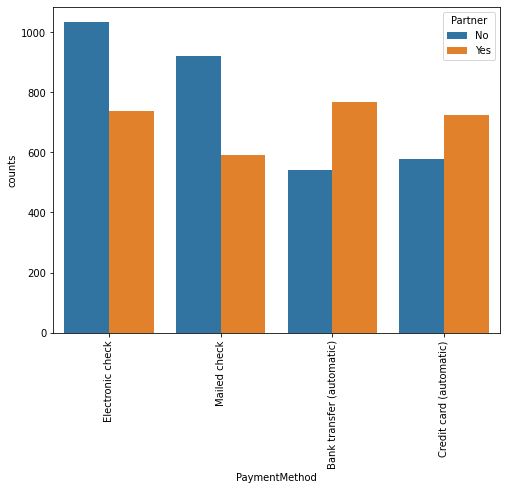

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_young_pay
            .groupby(['PaymentMethod', 'Partner'])
            .size()
            .reset_index(name='counts')
            .sort_values('counts',ascending=False), x='PaymentMethod', y='counts', hue='Partner')
plt.xticks(rotation=90)
plt.show()

Observation:

Based on the graphics above about the young customer:
For the customers who don't have any partner, the electronic check and mailed check are 2 most `PaymentMethod` they used. and for the customers who have already had partner, there are 3 most used payment method, which are Bank transfer (automatic), Electronic Check and Credit card (automatic). They have almost similar number of customers. The least payment method which used by young customers who have already had partner is mailed check


##Conclusion
1. The data does not contain major issues. There are only some 'white space' value and unsuit data types in `TotalCharges` column
2. Most of the columns with numerical values are not symmetric.
3. From the barplot we can see there is no any outliers on numerical type column
4. From correlation heatmap `tenure` and `total_charges` are highly correlated each other
5. From the pairplot, customers who has longer tenure are less to churn
6. Surprisingly, The most popular product for senior customer (>65 years old) is `InternetService`
7. The most popular product for young customer (<65 years old) is `PhoneService`
8. The most popular `PaymentMethod` for single customers are 'electronic check' and 'mailed check'.
9. The least popular `PaymentMethod` for customers who has partner is 'Mailed check'